<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 4 - Monte Carlo

### Due: Wednesday, October 7th 11:59 pm
    
</center>

Student Name: _Amin Majdi

The purpose of this project is to study different properties of Monte Carlo methods.  

In [2]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Problem
The objective of the popular casino card game of blackjack is to obtain cards that sum of whose numerical values is as great as possible without exceeding 21. All face cards count as 10, and an ace can count either as 1 or as 11. We consider the version in which each player competes independently against the dealer. The game begins with two cards dealt to both dealer and player. One of the dealer’s cards is face up and the other is face down. If the player has 21 immediately (an ace and a 10-card), it is called a natural. He then wins unless the dealer also has a natural, in which case the game is a draw. If the player does not have a natural, then he can request additional cards, one by one (hits), until he either stops (sticks) or exceeds 21 (goes bust). If he goes bust, he loses; if he sticks, then it becomes the dealer’s turn. The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, and hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome—win, lose, or draw—is determined by whose final sum is closer to 21. 

Playing blackjack is naturally formulated as an **episodic** finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards within a game are zero, and we do not discount ($\gamma=1$); therefore these terminal rewards are also the returns. The player’s actions are to hit or to stick. The states depend on the player’s cards and the dealer’s showing card. We assume that cards are dealt from an infinite deck (i.e., with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that he could count as 11 without going bust, then the ace is said to be usable. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: his current sum (12–21), the dealer’s one showing card (ace–10), and whether or not he holds a usable ace. This makes for a total of 200 states.




**Note:** for this homework you should use the implementation of the Blackjack game and you can import it into your notebook.

In [3]:
from blackjack import BlackJack

In [4]:
## how to use the BlackJack class


## Part I
Implement the **First-visit Monte Carlo prediction** algorithm. Consider the policy that sticks if the player’s sum is 20 or 21, and otherwise hits. And estimate the state-value function for this policy using the first-visit Monte Carlo prediction algorithm by simulating 500,000 blackjack games using the policy and average the returns following each state. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots). Your implementation should use the **incremental sample-average**.

In [5]:
# Your code here
 def policy(a,b,c):
        if a>=20:
            return 1
        else:
            return 0
        
 def First_visit_Monte_Carlo():
    v_s=[[[0 for depth in range(2)]for col in range(10)]for row in range(10)]
    return_s=[[[[] for depth in range(2)]for col in range(10)]for row in range(10)]
    round_num=0
    while round_num<500000:
        round_num+=1
        bjack = BlackJack()
        first_state, reward, trajectory = bjack.play(policy)
        G=0
        for i in range(len(trajectory)-1,-1,-1):
            if trajectory[i][0][0]==False:
                is_ace=0
            elif trajectory[i][0][0]==True:
                is_ace=1
            player_sum_col=trajectory[i][0][1]-12
            dealer_card_row=trajectory[i][0][2]-1
            G=reward
            return_s[dealer_card_row][player_sum_col][is_ace].append(G)
            v_s[dealer_card_row][player_sum_col][is_ace]=v_s[dealer_card_row][player_sum_col][is_ace]+((G-v_s[dealer_card_row][player_sum_col][is_ace])/len(return_s[dealer_card_row][player_sum_col][is_ace]))
            
    return(v_s)
 v=First_visit_Monte_Carlo()
 

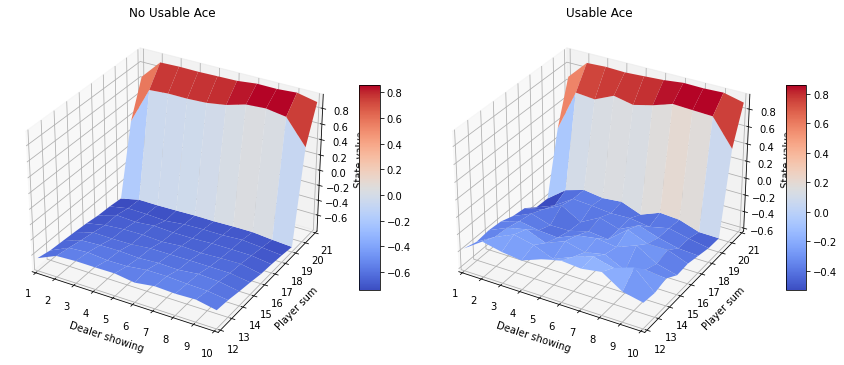

In [10]:
v_no=np.empty((10, 10))
v_yes=np.empty((10, 10))
for c in range(10):
    for d in range(10):
        v_no[c][d]=v[c][d][0]
        v_yes[c][d]=v[c][d][1]

x = [i for i in range(10)]
y = [i for i in range(10)]

X, Y = np.meshgrid(np.add(x, 12).tolist(), np.add(y, 1).tolist())
#Z = z_function(x, y)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
plt1=ax1.plot_surface(Y, X,v_no,cmap='coolwarm')
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)
ax1.set_xlabel('Dealer showing')
ax1.set_ylabel('Player sum')
ax1.set_zlabel('State value')
ax1.set_title('No Usable Ace')
fig.colorbar(plt1, ax=ax1, shrink=0.5, aspect=10)

plt2=ax2.plot_surface(Y, X,v_yes, cmap='coolwarm')
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
ax2.set_xlabel('Dealer showing')
ax2.set_ylabel('Player sum')
ax2.set_zlabel('State value')
ax2.set_title('Usable Ace')
fig.colorbar(plt2, ax=ax2, shrink=0.5, aspect=10)

fig.tight_layout()


## Part II
Use the previous policy (sticks if the player’s sum is 20 or 21, and otherwise hits) as the initial policy and find (i) the action-value estimates and (ii) the optimal policy using **Monte Carlo with Exploring Starts**. To make the starting states with uniform probabilities, pick the dealer’s cards, the player’s sum, and whether or not the player has a usable ace, according to a uniform sampling process. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).

In [8]:
# Your code here


def ini_state():#initial_state
    random_dealer_card=np.random.choice([1,2,3,4,5,6,7,8,9,10,11,12,13])
    if random_dealer_card>10:
        random_dealer_card=10
    random_player_sum=np.random.choice([12,13,14,15,16,17,18,19,20,21])
    U_Ace=np.random.choice([True,False])
    
    return [U_Ace,random_player_sum,random_dealer_card]
     
def random_action():
    act=np.random.choice([0,1])
    return act

def Monte_Carlo_ES():
    v_s_star=[[[0 for depth in range(2)]for col in range(10)]for row in range(10)]
    pi_s=[[[0 for depth in range(2)]for col in range(10)]for row in range(10)]
    for i in range(10):
        for j in range(8,10):
            for k in range(2):
                pi_s[i][j][k]=1
    return_s=[[[[[] for depth2 in range(2)] for depth in range(2)]for col in range(10)]for row in range(10)]
    Q=[[[[0 for depth2_ in range(2)] for depth_ in range(2)]for col_ in range(10)]for row_ in range(10)]
    round_num=0
    while round_num<500000:
        round_num+=1
        bjack = BlackJack()
        def updated_policy(p_sum,d_card,use_Ace):
            if use_Ace==True:
                use_Ace=1
            elif use_Ace==False:
                use_Ace=0
            else:
                use_Ace=0
            return pi_s[d_card-1][p_sum-12][use_Ace]
        new_state=ini_state()
        new_action=random_action()
        first_state, reward, trajectory = bjack.play(updated_policy,new_state,new_action)
        G=0
        for j in range(len(trajectory)-1,-1,-1):
            if trajectory[j][0][0]==False:
                is_ace=0
            elif trajectory[j][0][0]==True:
                is_ace=1
            player_sum_col=trajectory[j][0][1]-12
            dealer_card_row=trajectory[j][0][2]-1
            G=reward
            action_=trajectory[j][1]
            #print(action_)
            #print(type(action_))
            return_s[dealer_card_row][player_sum_col][is_ace][action_].append(G)
            Q[dealer_card_row][player_sum_col][is_ace][action_]=Q[dealer_card_row][player_sum_col][is_ace][action_]+((G-Q[dealer_card_row][player_sum_col][is_ace][action_])/len(return_s[dealer_card_row][player_sum_col][is_ace][action_]))
            pi_s[dealer_card_row][player_sum_col][is_ace]=np.argmax([Q[dealer_card_row][player_sum_col][is_ace][0],Q[dealer_card_row][player_sum_col][is_ace][1]])
    for ii in range(10):
        for jj in range(10):
            for kk in range(2):
                v_s_star[ii][jj][kk]=max(Q[ii][jj][kk][0],Q[ii][jj][kk][1])
    return v_s_star,pi_s 
v_s_star,pi_s = Monte_Carlo_ES()


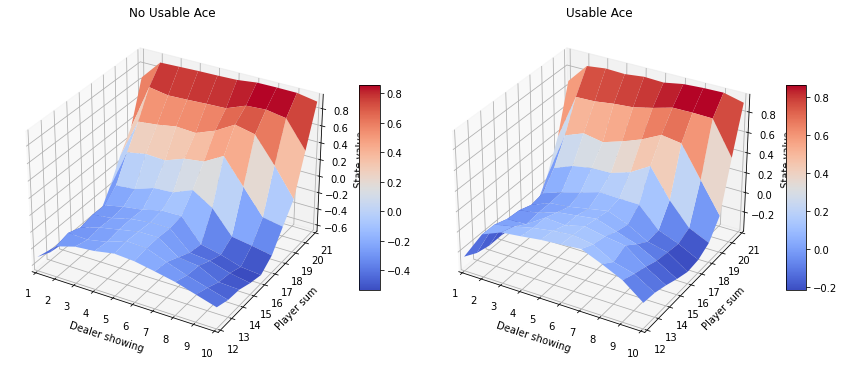

In [9]:

v_no=np.empty((10, 10))
v_yes=np.empty((10, 10))
pi_no=np.empty((10, 10))
pi_yes=np.empty((10, 10))
for cc in range(10):
    for dd in range(10):
        v_no[cc][dd]=v_s_star[cc][dd][0]
        v_yes[cc][dd]=v_s_star[cc][dd][1]
        pi_no[9-cc][dd]=pi_s[dd][cc][0]
        pi_yes[9-cc][dd]=pi_s[dd][cc][1]

x = [i for i in range(10)]
y = [i for i in range(10)]

X, Y = np.meshgrid(np.add(x, 12).tolist(), np.add(y, 1).tolist())

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')

plt1=ax1.plot_surface(Y, X,v_no,cmap='coolwarm')
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)
ax1.set_xlabel('Dealer showing')
ax1.set_ylabel('Player sum')
ax1.set_zlabel('State value')
ax1.set_title('No Usable Ace')
fig.colorbar(plt1, ax=ax1, shrink=0.5, aspect=10)

plt2=ax2.plot_surface(Y, X,v_yes, cmap='coolwarm')
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
ax2.set_xlabel('Dealer showing')
ax2.set_ylabel('Player sum')
ax2.set_zlabel('State value')
ax2.set_title('Usable Ace')
fig.colorbar(plt2, ax=ax2, shrink=0.5, aspect=10)

fig.tight_layout()

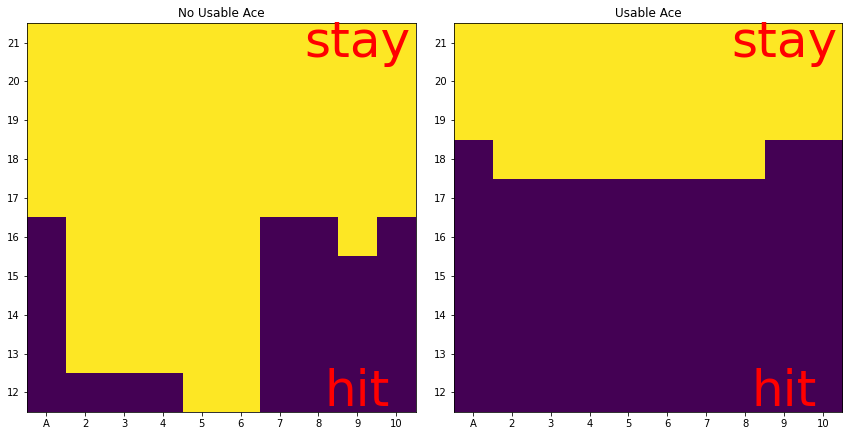

In [11]:
player_sum = ["21", "20", "19", "18","17", "16", "15", "14", "13", "12"]
dealer_card = ["A", "2", "3","4", "5", "6", "7", "8", "9", "10"]

fig = plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
im = ax1.imshow(pi_no)

ax1.set_xticks(np.arange(len(dealer_card)))
ax1.set_yticks(np.arange(len(player_sum)))
ax1.set_xticklabels(dealer_card)
ax1.set_yticklabels(player_sum)
ax1.set_title('No Usable Ace')
text = ax1.text(8, 0, 'stay',ha="center", va="center", color="r",fontsize=50)
text2 = ax1.text(8, 9, 'hit',ha="center", va="center", color="r",fontsize=50)

ax2=fig.add_subplot(122)
im2 = ax2.imshow(pi_yes)

ax2.set_xticks(np.arange(len(dealer_card)))
ax2.set_yticks(np.arange(len(player_sum)))
ax2.set_xticklabels(dealer_card)
ax2.set_yticklabels(player_sum)
ax2.set_title('Usable Ace')
text3 = ax2.text(8, 0, 'stay',ha="center", va="center", color="r",fontsize=50)
text4 = ax2.text(8, 9, 'hit',ha="center", va="center", color="r",fontsize=50)

fig.tight_layout()
#plt.show()

## Part III
Extend your algorithm to the **off-policy Monte Carlo control with weighted importance sampling** and estimate action-values and the target policy. You need to consider an arbitrary soft behavior policy. Plot the 3D graph of state-value (z-axis), dealer showing (x-axis), player sum (y-axis) for both usable ace and not usable ace states (i.e. you should have two plots) for 500,000 simulated games. Also plot the optimal policy for both the usable ace and not usable ace states for all the player’s sum and dealer showing (i.e. you should have two plots).

In [12]:
def Monte_Carlo_off_policy():
    Q=[[[[0 for depth2 in range(2)] for depth in range(2)]for col in range(10)]for row in range(10)]
    C=[[[[0 for depth2 in range(2)] for depth in range(2)]for col in range(10)]for row in range(10)]
    #v_s_star=[[[0 for depth in range(2)]for col in range(10)]for row in range(10)]
    pi_s=[[[0 for depth in range(2)]for col in range(10)]for row in range(10)] 
    #pi_s[:][8:10][:]=[[[1 for depth in range(2)]for col in range(2)]for row in range(10)] 
    #return_s=[[[[[] for depth2 in range(2)] for depth in range(2)]for col in range(10)]for row in range(10)]
    for row_ in  range(10):
        for col_ in range(10):
            for depth_ in range(2):
                if Q[row_][col_][depth_][0]==Q[row_][col_][depth_][1]:
                    pi_s[row_][col_][depth_]=np.random.choice([0,1])
                else:
                    pi_s[row_][col_][depth_]=np.argmax([Q[row_][col_][depth_][0],Q[row_][col_][depth_][1]])
    
    round_num=0
    while round_num<500000:
        round_num+=1
        bjack = BlackJack()
        def updated_policy_(p_sum,d_card,use_Ace):
            e=(22-p_sum)/11
            if np.random.rand(1)>e:
                policy_return=0
            else:
                policy_return=1
            return policy_return
        first_state, reward, trajectory = bjack.play(updated_policy_)
        G=0
        W=1
        for i__ in range(len(trajectory)-1,-1,-1):
            if trajectory[i__][0][0]==False:
                is_ace=0
            elif trajectory[i__][0][0]==True:
                is_ace=1
            player_sum_col=int(trajectory[i__][0][1]-12)
            dealer_card_row=int(trajectory[i__][0][2]-1)
            action_=trajectory[i__][1]
            G=reward
            C[dealer_card_row][player_sum_col][is_ace][action_]=C[dealer_card_row][player_sum_col][is_ace][action_]+W
            Q[dealer_card_row][player_sum_col][is_ace][action_]=(Q[dealer_card_row][player_sum_col][is_ace][action_])+(W/C[dealer_card_row][player_sum_col][is_ace][action_])*(G-Q[dealer_card_row][player_sum_col][is_ace][action_])
            if Q[dealer_card_row][player_sum_col][is_ace][0]!=Q[dealer_card_row][player_sum_col][is_ace][1]:
                pi_s[dealer_card_row][player_sum_col][is_ace]=np.argmax([Q[dealer_card_row][player_sum_col][is_ace][0],Q[dealer_card_row][player_sum_col][is_ace][1]])
            else: 
                pi_s[dealer_card_row][player_sum_col][is_ace]=np.random.choice([0,1])
            if action_ != pi_s[dealer_card_row][player_sum_col][is_ace]:
                break
            if action_==1:
                p_At_St=(10-player_sum_col)/11
            else:
                p_At_St=1-((10-player_sum_col)/11)
            W=W/p_At_St

    for i_ in range(10):
        for j_ in range(10):
            for k_ in range(2):
                v_s_star[i_][j_][k_]=max(Q[i_][j_][k_][0],Q[i_][j_][k_][1])
    return v_s_star,pi_s 
v_s_star,pi_s=Monte_Carlo_off_policy()

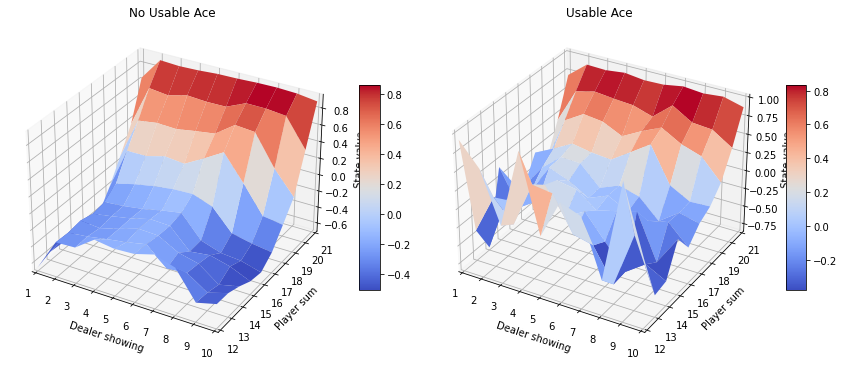

In [13]:
v_no=np.empty((10, 10))
v_yes=np.empty((10, 10))
pi_no=np.empty((10, 10))
pi_yes=np.empty((10, 10))
for cc_ in range(10):
    for dd_ in range(10):
        v_no[cc_][dd_]=v_s_star[cc_][dd_][0]
        v_yes[cc_][dd_]=v_s_star[cc_][dd_][1]
        pi_no[9-cc_][dd_]=pi_s[dd_][cc_][0]
        pi_yes[9-cc_][dd_]=pi_s[dd_][cc_][1]

x = [i for i in range(10)]
y = [i for i in range(10)]

X, Y = np.meshgrid(np.add(x, 12).tolist(), np.add(y, 1).tolist())
#Z = z_function(x, y)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')

plt1=ax1.plot_surface(Y, X,v_no,cmap='coolwarm')
ax1.set_ylim(12, 21)
ax1.set_xlim(1, 10)
ax1.set_xlabel('Dealer showing')
ax1.set_ylabel('Player sum')
ax1.set_zlabel('State value')
ax1.set_title('No Usable Ace')
fig.colorbar(plt1, ax=ax1, shrink=0.5, aspect=10)



plt2=ax2.plot_surface(Y, X,v_yes, cmap='coolwarm')
ax2.set_ylim(12, 21)
ax2.set_xlim(1, 10)
ax2.set_xlabel('Dealer showing')
ax2.set_ylabel('Player sum')
ax2.set_zlabel('State value')
ax2.set_title('Usable Ace')
fig.colorbar(plt2, ax=ax2, shrink=0.5, aspect=10)

fig.tight_layout()

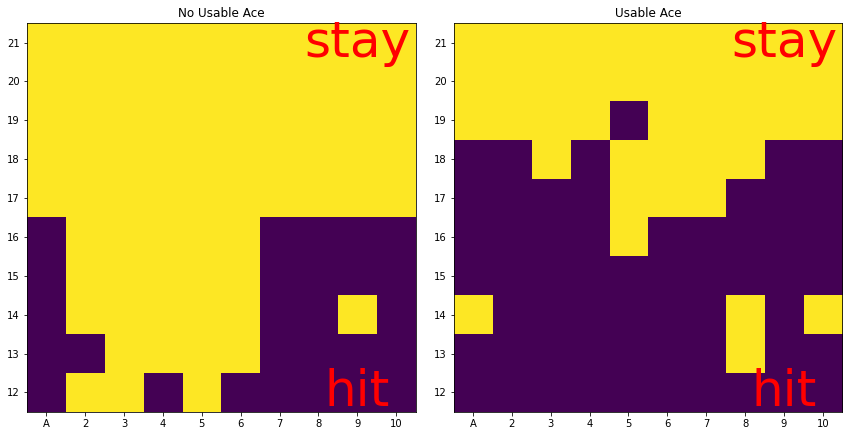

In [14]:
player_sum = ["21", "20", "19", "18","17", "16", "15", "14", "13", "12"]
dealer_card = ["A", "2", "3","4", "5", "6", "7", "8", "9", "10"]

fig = plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
im = ax1.imshow(pi_no)

ax1.set_xticks(np.arange(len(dealer_card)))
ax1.set_yticks(np.arange(len(player_sum)))
ax1.set_xticklabels(dealer_card)
ax1.set_yticklabels(player_sum)
ax1.set_title('No Usable Ace')
text = ax1.text(8, 0, 'stay',ha="center", va="center", color="r",fontsize=50)
text2 = ax1.text(8, 9, 'hit',ha="center", va="center", color="r",fontsize=50)

ax2=fig.add_subplot(122)
im2 = ax2.imshow(pi_yes)

ax2.set_xticks(np.arange(len(dealer_card)))
ax2.set_yticks(np.arange(len(player_sum)))
ax2.set_xticklabels(dealer_card)
ax2.set_yticklabels(player_sum)
ax2.set_title('Usable Ace')
text3 = ax2.text(8, 0, 'stay',ha="center", va="center", color="r",fontsize=50)
text4 = ax2.text(8, 9, 'hit',ha="center", va="center", color="r",fontsize=50)

fig.tight_layout()

Answer the following questions:

a.	What behavior policy did you select? Why does it make sense?
> Answer As a behavior policy generator, I made a function that the more player's Sum is close to 21 the higher stay probability will be. for example the probability of hit in states with  player's Sum=18 will be:$(22-18)/11=4/11$ but the probability of hit in states with  player's Sum=12 will be:$(22-12)/11=10/11$
<br>In my opinion this policy make sense because it is close to reality and needs less exploration in general. also it is a valid soft policy, because it covers all actions in all states. 

b.	How does the obtained target policy in this part compare to the target policies in parts I and II? Is it different? Why? 
> Answer In same amount of play (500k) this policy acts beter than I and worse than II.because in part 1 we had a fixed policy and it never updated ,so there is no exploration in this part . in part 2 we directly update our target policy so exploration quickly leads us to optimal policy.although in part 3 we are exploring all posible actions in states, in same amount of iteration we can not reach the result in part 2 , because we are indirectly updating our target policy. if we run part 3 for 5M episodes the target policy will be very close to target policy in part 2.